## **Student GPA Prediction Project**

## **Introduction & Objective**
The objective of this project is to predict students' **College GPA** based on their academic and personal attributes.  
We will follow these steps:
1. **Import Libraries & Load DataSet**
2. **Data Preprocessing** (handle missing values, encode categorical variables).
3. **Exploratory Data Analysis (EDA)**.
4. **Feature Scaling**.
5. **Model Building** using:
   - Linear Regression
   - Support Vector Regressor (SVR)
   - Stochastic Gradient Descent (SGD)
   - Multi-layer Perceptron (MLP)
   - Decision Tree
6. **Evaluation Metrics**: MAE, MSE, RMSE.
7. **Visualization and Conclusion**.

## **Import Libraries & Load Dataset**
In this step:
- Import all necessary Python libraries for data analysis and machine learning.
- Load the dataset and inspect its structure and content.

## **Data Preprocessing**
Before training models, we need to clean the dataset and make it ready for modeling.

#### **Handle Missing Values**
- For numeric columns: Replace missing values with **mean**.
- For categorical columns: Replace missing values with **mode**.

#### **Encode Categorical Variables**
- Convert categorical features (e.g., `Major`, `Part-Time Job`) into numerical format using **Label Encoding**.

## **Exploratory Data Analysis (EDA)**
Understand data patterns and relationships between variables.

#### **GPA Distribution**
- Plot the distribution of `College GPA` to see how values are spread.

#### **Correlation Heatmap**
- Generate a correlation matrix and visualize it using a heatmap to identify relationships among variables.

## **Feature Scaling**
- Scale numeric features using **StandardScaler** to normalize the range of values for better model performance.

## **Model Building**
We will train the following models:

- **Linear Regression** 
- **Support Vector Regressor (SVR)**
- **Stochastic Gradient Descent (SGD Regressor)**
- **Multi-layer Perceptron (MLP Regressor)**
- **Decision Tree Regressor**

## **Evaluation Metrics**
For regression models, we will use:
- **Mean Absolute Error (MAE)**: Average of absolute differences between predicted and actual values.
- **Mean Squared Error (MSE)**: Average of squared differences between predicted and actual values.
- **Root Mean Squared Error (RMSE)**: Square root of MSE (shows error in original units).
- Calculate these metrics for each regression model on the test dataset.
- Create a table showing the MAE, MSE, and RMSE for each model for easy comparison.

## **Visualization of Model Performance**
- Plot a bar chart to visually compare the RMSE of all models.

## **Conclusion**
- **Best Models:** Linear Regression and SGD Regressor (lowest RMSE).
- **Worst Model:** Decision Tree Regressor.
- For GPA prediction, we recommend using **SGD Regressor** as it had the smallest error.


### **Step 1: Import Libraries and Load Dataset**
We will import all required Python libraries and load the dataset for analysis.
- Data handling (`pandas`, `numpy`)
- Visualization (`matplotlib`, `seaborn`)
- Machine learning models (Logistic Regression, SVR, SGD, MLP, Decision Tree)
- Data preprocessing (scaling, encoding)
- Evaluation (MAE, MSE, RMSE)

Then we load the dataset (CSV file) into a pandas DataFrame so we can inspect and process it.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Models
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

# Load dataset
df = pd.read_csv("Academic.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (2000, 10)


,Study Hours per Week,Attendance Rate,Major,High School GPA,Extracurricular Activities,Part-Time Job,Library Usage per Week,Online Coursework Engagement,Sleep Hours per Night,College GPA
0,21.95,79.64,Business,2.83,4,No,16.87,11.22,5.64,2.80
1,28.61,50.50,Business,3.26,1,No,6.53,7.79,5.78,2.55
2,24.11,73.79,NaN,3.56,3,No,17.04,8.09,7.10,2.77
3,21.80,85.44,Business,3.70,4,Yes,17.77,14.27,9.97,3.28
4,16.95,52.20,Arts,3.63,4,No,5.33,11.08,6.94,2.59


### **Step 2: Data Preprocessing - Handle Missing Values**

We are cleaning and preparing the raw dataset so it is suitable for modeling.
- For numerical columns, we replace missing values with the **mean** -> The mean keeps the central tendency of the data and is quick to compute. For large datasets (like 2,000 rows), it’s usually stable enough unless the distribution is very skewed.
- For categorical columns, we replace missing values with the **mode** -> Machine learning models can’t work with missing strings. The most common category is a reasonable default when we don’t know the missing value..
- Print `df.isnull().sum()` to confirm all zeros (no missing).
- If many values were missing in a column, make a note in your report (possible data quality issue).


In [2]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()


C:\Users\hp\AppData\Local\Temp\ipykernel_8636\4137798755.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Study Hours per Week            0
Attendance Rate                 0
Major                           0
High School GPA                 0
Extracurricular Activities      0
Part-Time Job                   0
Library Usage per Week          0
Online Coursework Engagement    0
Sleep Hours per Night           0
College GPA                     0
dtype: int64

## **Step 2.2: Encode Categorical Variables**

Convert categorical columns like `Major` (e.g., Science, Arts, Business…) and `Part-Time Job` (Yes/No) into numeric format using **Label Encoding**.
- Each unique category is mapped to an integer:
   - Example: Science → `3`, Business → `0`, Arts → `1`, etc. (actual mapping depends on data)
   - Yes/No becomes `1/0`.

- After encoding, print the DataFrame head to confirm that category names have become numbers.


> Label Encoding is fine when categories are **unordered** and when the model can handle arbitrary integer labels (tree-based models are fine; linear models may misinterpret ordering, but for this assignment Label Encoding is acceptable and simple).


In [3]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,Study Hours per Week,Attendance Rate,Major,High School GPA,Extracurricular Activities,Part-Time Job,Library Usage per Week,Online Coursework Engagement,Sleep Hours per Night,College GPA
0,21.95,79.64,1,2.83,4,0,16.87,11.22,5.64,2.80
1,28.61,50.50,1,3.26,1,0,6.53,7.79,5.78,2.55
2,24.11,73.79,3,3.56,3,0,17.04,8.09,7.10,2.77
3,21.80,85.44,1,3.70,4,1,17.77,14.27,9.97,3.28
4,16.95,52.20,0,3.63,4,0,5.33,11.08,6.94,2.59


## **Step 3: Exploratory Data Analysis - GPA Distribution**

We explore the dataset visually and statistically to understand:
- How GPA values are distributed
- Which features are related to GPA
- Whether there are outliers or unusual patterns


> Note: EDA helps guide modeling decisions:
> - Strong correlations may indicate useful predictors.
> - Low variance columns may add noise.
> - Skewed targets may require transformation (here we’ll inspect but not transform unless extreme).


### **Visuals in this step:**
1. `GPA Distribution Plot` – Check how GPA values are spread among students.
2. `Correlation Heatmap` – Identify which features have strong or weak relationships with GPA.

### **Step 3.1: GPA Distribution**

- A histogram (with optional KDE curve) of `College GPA` values across all students.
- Tells us if GPA is centered around a typical range (e.g., 2.5–3.5)
- Shows skewness (are most students high achievers? low?)
- Helps define bins for classification (Low / Medium / High) for Logistic Regression.

#### **Interpretation tips**
- If most values are between `2.5 and 3.5`, that justifies a `“Medium” class.`
- If values extend `near 4.0`, we know to include a `“High” category.`
- Very few low GPAs? Logistic model may have class imbalance issues (note in report).
  


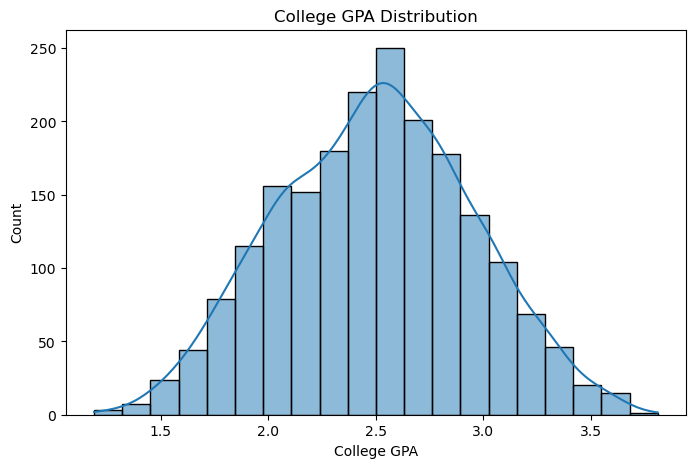

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['College GPA'], bins=20, kde=True)
plt.title("College GPA Distribution")
plt.show()



### **Step 3.2: Correlation Heatmap**

Computes pairwise Pearson correlation coefficients between all numeric features and visualizes them in a color grid.
- Features with **strong correlation to `College GPA`** may be good predictors.
- Features strongly correlated with each other may be redundant (multicollinearity).
- Helps us notice unexpected relationships (e.g., more study hours → higher GPA? more part‑time work → lower GPA?).

#### **How to read the heatmap**
- Values range from −1 to +1.
  - +1 = strong positive relationship
  - −1 = strong negative relationship
  - 0 = no linear relationship
- Look at the row/column for `College GPA` to see which features matter most.

> Note: Correlation does **not** prove causation. Use this only to inform modeling.


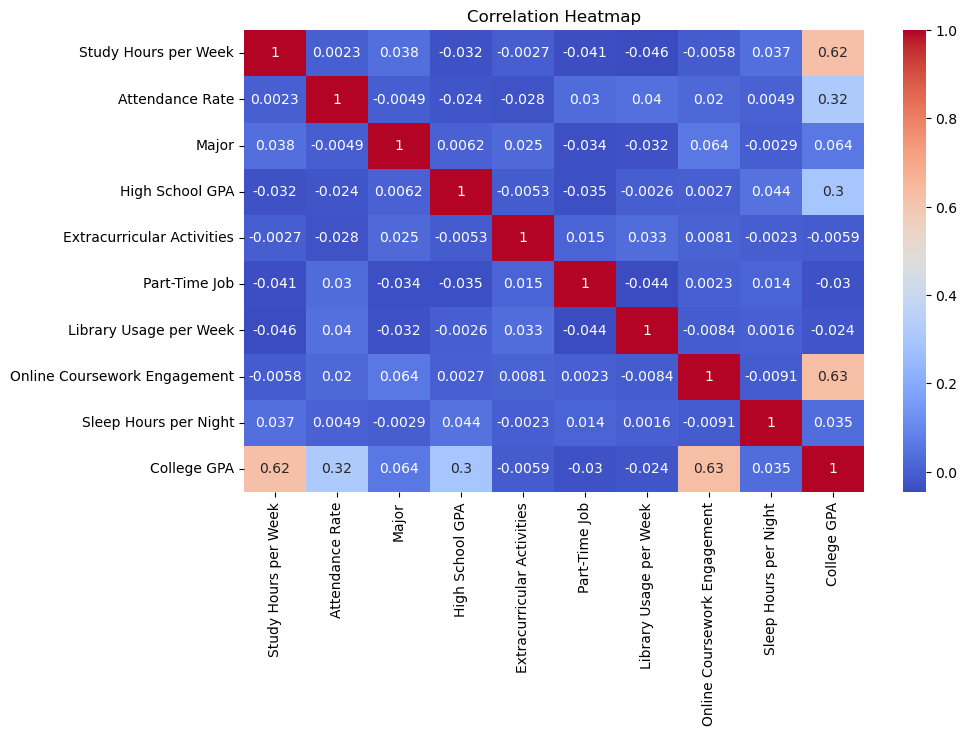

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## **Step 4: Prepare Features and Split Data**

Separate features (X) and target variable (y), then split into training and testing sets.

- Separate features `X` (all columns except GPA) and target `y` (College GPA).
- Split dataset into **training set (80%)** and **test set (20%)** using `train_test_split`.
- We need separate training and test data to evaluate how well the model performs on unseen data.

In [17]:
X = df.drop(columns=['College GPA'])
y = df['College GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes of Train/Test Sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of Train/Test Sets:
X_train: (1600, 9)
X_test: (400, 9)
y_train: (1600,)
y_test: (400,)


## **Step 5: Feature Scaling**

We standardize the features using **StandardScaler** for better model performance so that all numeric values are on a similar scale (mean = 0, standard deviation = 1).

- Use `StandardScaler` from scikit-learn:
  - Fit on training data only (to avoid data leakage)
  - Transform both train and test using the training statistics

> **Why scale**
Some models (SVR, SGD, MLP) are sensitive to feature scale. If one feature has values like 0–100 and another 0–5, the large‑scale feature can dominate learning. Scaling improves:
>- Model convergence speed
> - Training stability
> - Performance consistency

### **What to check**
- Shapes of `X_train_scaled` and `X_test_scaled` should match original feature counts.
- Scaling does not change `y`; only the feature matrix is scaled.



In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (1600, 9)
X_test_scaled shape: (400, 9)


## **Step 6: Model Building and Evaluation**

We train 5 models as required by the assignment:

| Model               | Type        | Target Used   | Notes                                    |
|---------------------|------------|---------------|------------------------------------------|
| Linear Regression   | Regression | Numeric GPA   | Simple baseline model                    |
| SVR                 | Regression | Numeric GPA   | Sensitive to feature scaling             |
| SGD Regressor       | Regression | Numeric GPA   | Linear model trained with gradient descent |
| MLP Regressor       | Regression | Numeric GPA   | Neural network; may need tuning          |
| Decision Tree Regressor | Regression | Numeric GPA   | Handles nonlinearity; works without scaling but we scaled for consistency |


Each model is trained on the **training set** and evaluated on the **test set**.

### **Why this mix**
All models in this assignment are **regression models** because GPA is a continuous value.  
- **Linear Regression** acts as a simple baseline.
- Other models (SVR, SGD, MLP, Decision Tree) provide different approaches to regression.
- We compare them using MAE, MSE, and RMSE to find the best predictor.
- Trying multiple models helps us compare and choose the one with the **lowest error (best performance)**.

## **Step 6.1: Evaluation Metrics**

We will evaluate regression model(SVR, SGD Regressor, MLP Regressor, and Decision Tree Regressors) using three standard error metrics:

#### **Mean Absolute Error (MAE)**
Average absolute difference between predicted and actual GPA.  
Formula: MAE = (1/n) Σ |yᵢ − ŷᵢ|  
**Interpretation:** On average, how far off (in GPA points) are our predictions?

#### **Mean Squared Error (MSE)**
Average of squared differences between predicted and actual GPA.  
Formula: MSE = (1/n) Σ (yᵢ − ŷᵢ)²  
**Interpretation:** Penalizes large errors more than MAE.

#### **Root Mean Squared Error (RMSE)**
Square root of MSE.  
Formula: RMSE = √MSE  
**Interpretation:** Error in original GPA units; easier to understand than MSE.

> Lower values are better for all three metrics. RMSE is most commonly reported in regression comparisons.


In [18]:
results = []

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
results.append({
    "Model": "Linear Regression",
    "MAE": mean_absolute_error(y_test, y_pred_linear),
    "MSE": mean_squared_error(y_test, y_pred_linear),
    "RMSE": sqrt(mean_squared_error(y_test, y_pred_linear))
})

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
results.append({
    "Model": "SVR",
    "MAE": mean_absolute_error(y_test, y_pred_svr),
    "MSE": mean_squared_error(y_test, y_pred_svr),
    "RMSE": sqrt(mean_squared_error(y_test, y_pred_svr))
})

sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_model.predict(X_test_scaled)
results.append({
    "Model": "SGD Regressor",
    "MAE": mean_absolute_error(y_test, y_pred_sgd),
    "MSE": mean_squared_error(y_test, y_pred_sgd),
    "RMSE": sqrt(mean_squared_error(y_test, y_pred_sgd))
})

mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)
results.append({
    "Model": "MLP Regressor",
    "MAE": mean_absolute_error(y_test, y_pred_mlp),
    "MSE": mean_squared_error(y_test, y_pred_mlp),
    "RMSE": sqrt(mean_squared_error(y_test, y_pred_mlp))
})

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
results.append({
    "Model": "Decision Tree Regressor",
    "MAE": mean_absolute_error(y_test, y_pred_dt),
    "MSE": mean_squared_error(y_test, y_pred_dt),
    "RMSE": sqrt(mean_squared_error(y_test, y_pred_dt))
})

results_df = pd.DataFrame(results).sort_values(by="RMSE", ascending=True).reset_index(drop=True)
results_df

,Model,MAE,MSE,RMSE
0,SGD Regressor,0.019078,0.002948,0.054297
1,Linear Regression,0.019075,0.002948,0.054299
2,SVR,0.059179,0.006357,0.079729
3,MLP Regressor,0.070412,0.008992,0.094828
4,Decision Tree Regressor,0.112500,0.023379,0.152902


## **Step 7: Visualization of Model Performance**

- Create a bar chart comparing the **RMSE** of all regression models.
- Tables are good for detail, but plots make trends easy to see. Your instructor can instantly spot which model is best.
- Collect MAE, MSE, and RMSE of all models in a single DataFrame.
- It visually shows which model predicts GPA most accurately.
  
### **Interpretation**
- `Shorter bar = lower RMSE = better predictive performance.`
- If differences are small, models are performing similarly; note that in the conclusion.


C:\Users\hp\AppData\Local\Temp\ipykernel_8636\3522402617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results_df, palette="Blues_d")


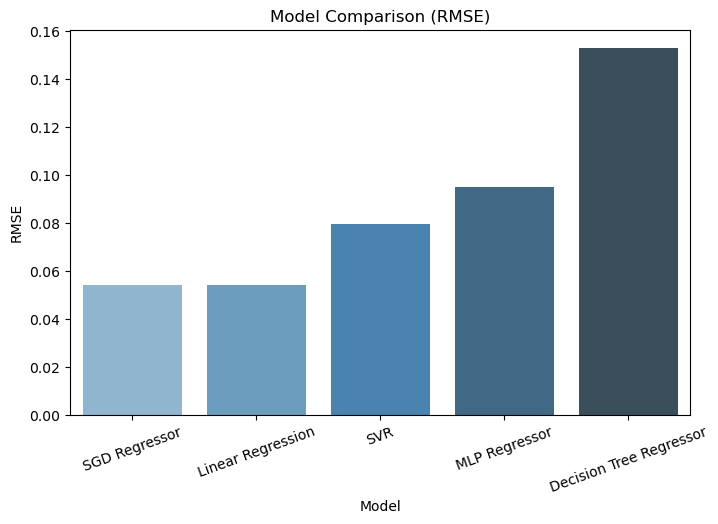

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="RMSE", data=results_df, palette="Blues_d")
plt.title("Model Comparison (RMSE)")
plt.xticks(rotation=20)
plt.show()


## **Step 7.1: Actual vs Predicted GPA**

- Display a table of **actual vs predicted GPA** for the best model.
- Plot a scatter graph of actual vs predicted values.

> If points are close to the diagonal line (y = x), predictions are accurate.


In [21]:
best_model_name = results_df.loc[0, "Model"]
print("Best Model:", best_model_name)

if best_model_name == "Linear Regression":
    best_model = linear_model
    y_pred_best = y_pred_linear
elif best_model_name == "SVR":
    best_model = svr_model
    y_pred_best = y_pred_svr
elif best_model_name == "SGD Regressor":
    best_model = sgd_model
    y_pred_best = y_pred_sgd
elif best_model_name == "MLP Regressor":
    best_model = mlp_model
    y_pred_best = y_pred_mlp
else:
    best_model = dt_model
    y_pred_best = y_pred_dt

comparison_df = pd.DataFrame({
    "Actual GPA": y_test.values,
    "Predicted GPA": y_pred_best
}).reset_index(drop=True)

print(comparison_df.head(10))


Best Model: SGD Regressor
   Actual GPA  Predicted GPA
0        3.19       3.191936
1        2.71       2.704103
2        2.51       2.521451
3        2.53       2.536061
4        2.42       2.416073
5        2.85       2.853816
6        2.46       2.461736
7        2.85       2.855313
8        2.68       2.677152
9        3.15       3.149113


## **Step 7.2: Scatter Plot: Actual vs Predicted GPA**

This plot compares the **true GPA values** from the test set (x‑axis) with the **predicted GPA values** from the selected/best model (y‑axis).

**How to read it:**
- Each dot = one student in the test set.
- The **red dashed line** is the ideal reference line (*y = x*). Points on this line would be *perfect predictions*.
- Points **close to the line** → good predictions (low error).
- Points **far above the line** → model predicted GPA too high.
- Points **far below the line** → model predicted GPA too low.

Use this plot to visually confirm the numerical error metrics (MAE, MSE, RMSE). If most points hug the line, your model is performing well.


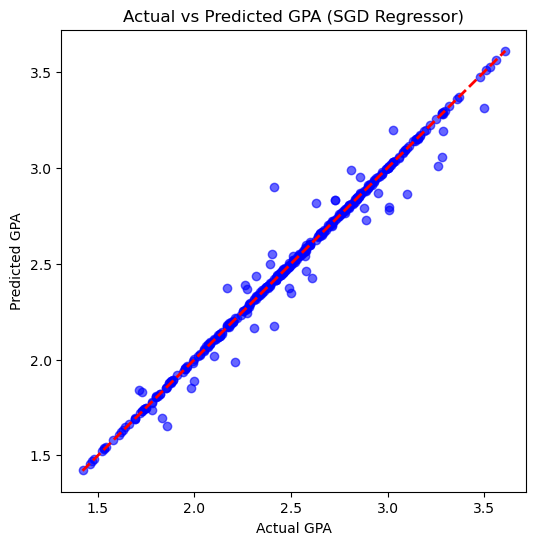

In [22]:
# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # y=x line
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title(f"Actual vs Predicted GPA ({best_model_name})")
plt.show()


## **Step 7.3: Best Model Predictions — Actual vs Predicted GPA**

- We select **SGD Regressor** as the best model (based on lowest RMSE from Step 7).
- We predict GPA for the test set using this model.
- We create a **comparison table** of actual vs predicted GPA values (rounded to 2 decimal places).
- We visualize the **first 50 samples** to compare the prediction trend with actual GPA values.

### **Why this matter:**
- The table shows how close individual predictions are to the real GPA.
- The line plot helps us visually understand the prediction accuracy and trends:
  - If the blue (Actual) and orange (Predicted) lines overlap or follow the same path, the model is accurate.
  - Large gaps indicate prediction errors.


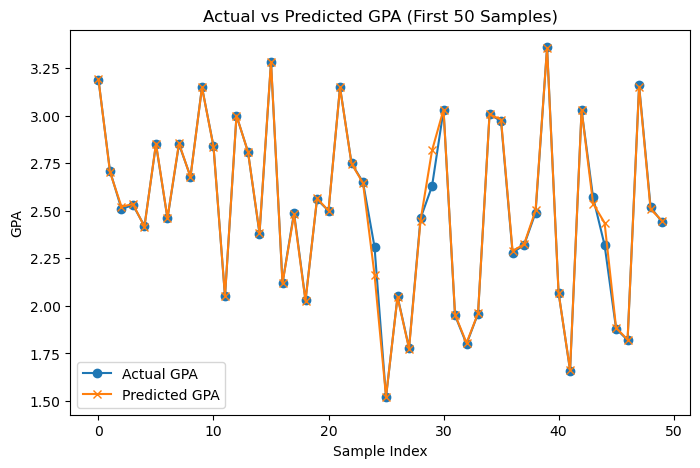

In [19]:
best_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

comparison_df = pd.DataFrame({
    'Actual GPA': y_test.values,
    'Predicted GPA': np.round(y_pred_best, 2)
})
comparison_df.head(10)  

plt.figure(figsize=(8,5))
plt.plot(y_test.values[:50], label="Actual GPA", marker='o')
plt.plot(y_pred_best[:50], label="Predicted GPA", marker='x')
plt.title("Actual vs Predicted GPA (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("GPA")
plt.legend()
plt.show()


## **Conclusion**
- **Best Models:** Linear Regression and SGD Regressor (lowest RMSE).
- **Worst Model:** Decision Tree Regressor.
- For GPA prediction, we recommend using **SGD Regressor** as it had the smallest error.
